#Car Price Prediction Practice Project

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("car data.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
print(df["Owner"].unique())
print(df["Seller_Type"].unique())


[0 1 3]
[&#39;Dealer&#39; &#39;Individual&#39;]


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.loc[df["Present_Price"].idxmax()]

Car_Name         land cruiser
Year                     2010
Selling_Price              35
Present_Price            92.6
Kms_Driven              78000
Fuel_Type              Diesel
Seller_Type            Dealer
Transmission           Manual
Owner                       0
Name: 86, dtype: object

In [13]:
df.columns

Index([&#39;Car_Name&#39;, &#39;Year&#39;, &#39;Selling_Price&#39;, &#39;Present_Price&#39;, &#39;Kms_Driven&#39;,
       &#39;Fuel_Type&#39;, &#39;Seller_Type&#39;, &#39;Transmission&#39;, &#39;Owner&#39;],
      dtype=&#39;object&#39;)

In [19]:
#Creating DAtaset with no car names and replacing years to yearsUsed
FinalDataSet=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]


In [22]:
FinalDataSet['CurrentYear']=2020
FinalDataSet['Car_Years']=FinalDataSet['CurrentYear']-FinalDataSet['Year']
FinalDataSet.drop(['Year'],axis=1,inplace=True)
FinalDataSet.drop(['CurrentYear'],axis=1,inplace=True)
FinalDataSet.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [25]:
FinalDataSet=pd.get_dummies(FinalDataSet,drop_first=True)
FinalDataSet.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


&lt;seaborn.axisgrid.PairGrid at 0x122962550&gt;

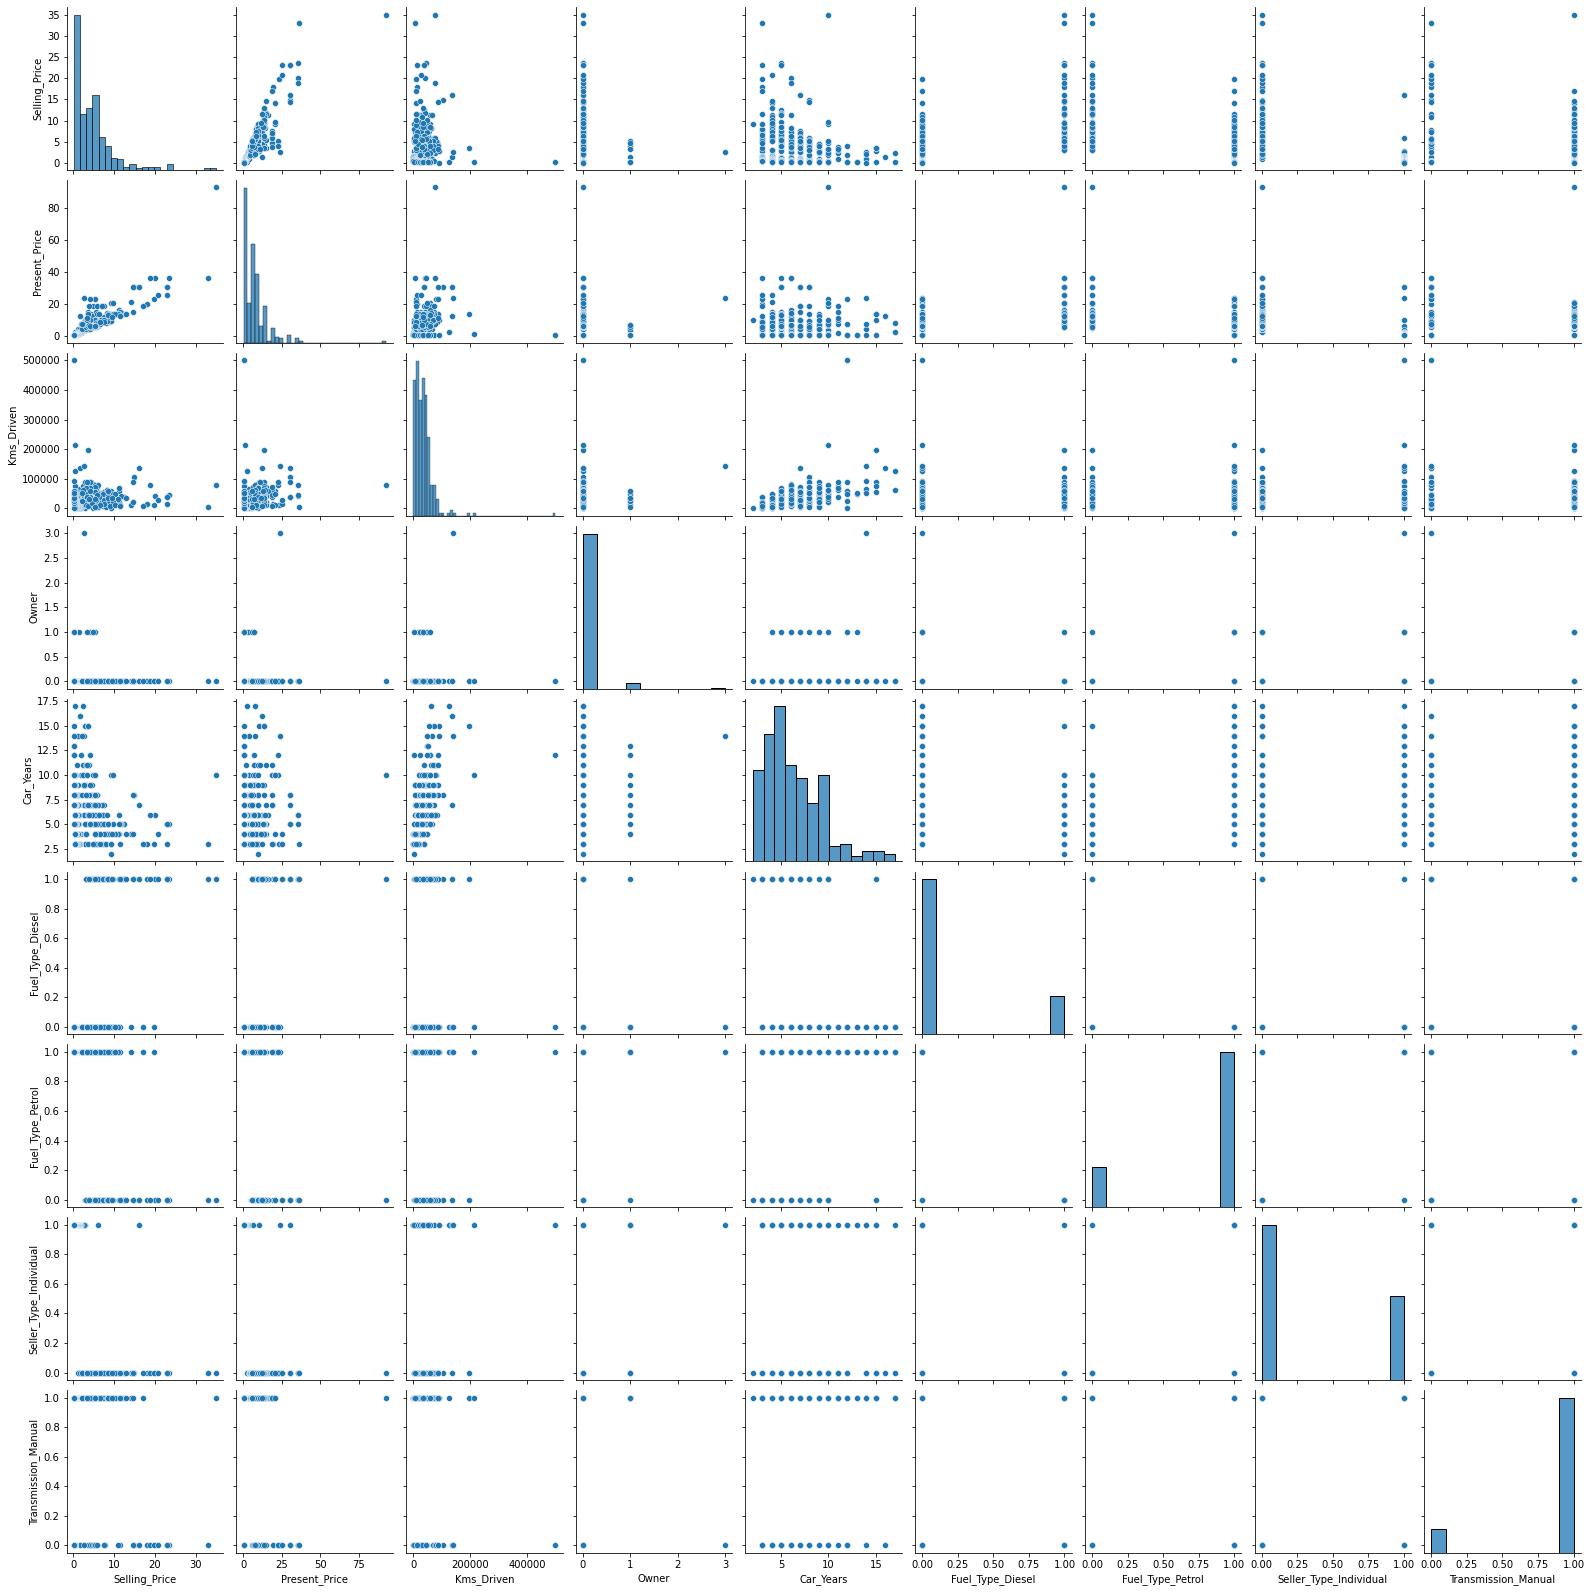

In [26]:
import seaborn as sb
sb.pairplot(FinalDataSet)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

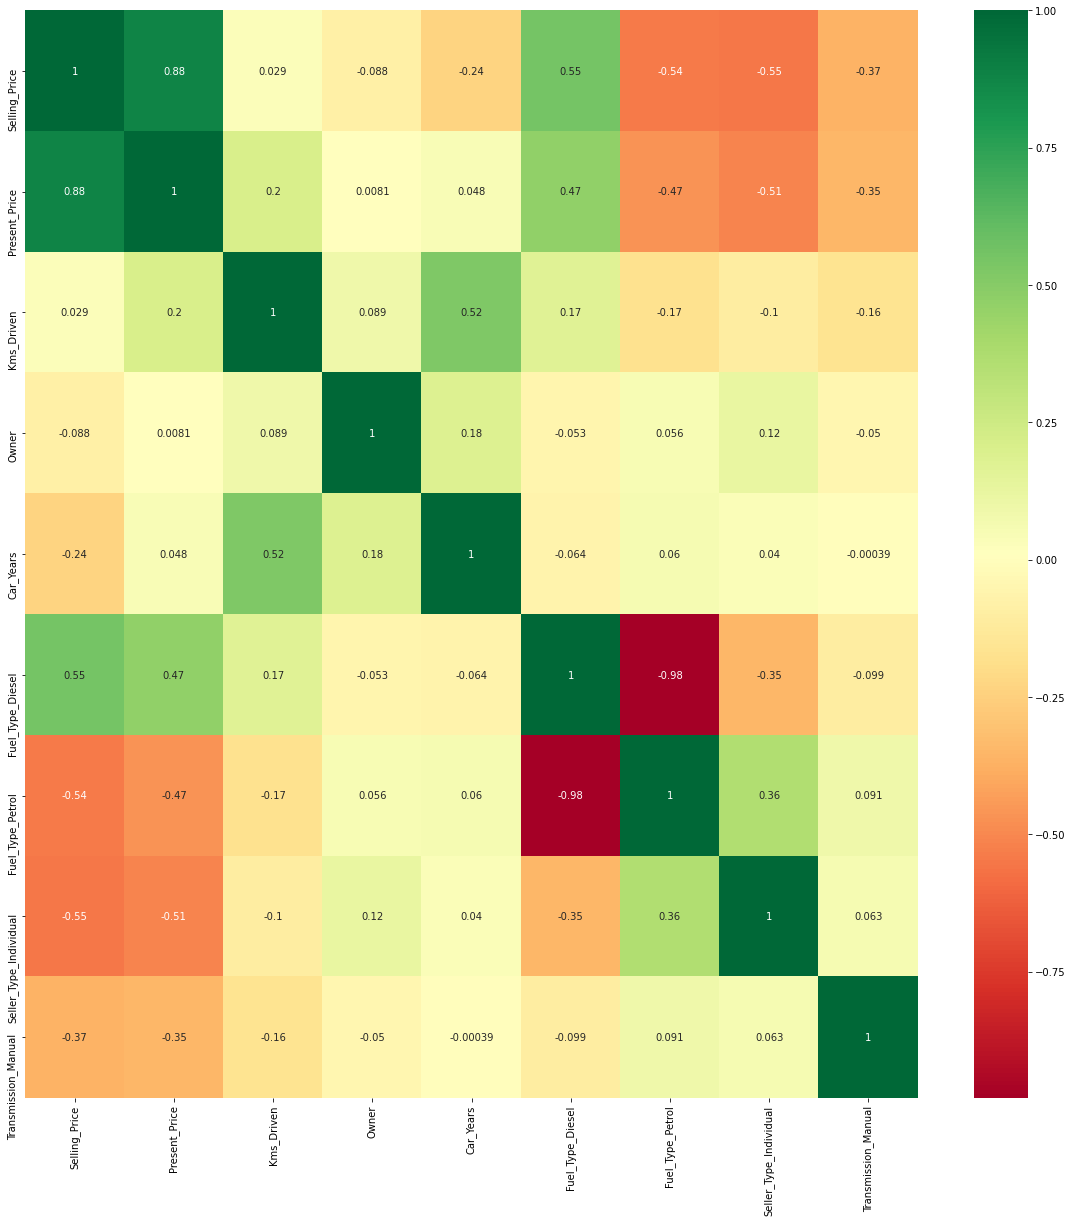

In [32]:
corrmat=FinalDataSet.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#Plotting Heat map
g=sb.heatmap(FinalDataSet[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [35]:
#Independant and Dependant feature
#X-independant and Y-Dependant(only selling price)
x=FinalDataSet.iloc[:,1:]
y=FinalDataSet.iloc[:,0]

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [38]:
print(model.feature_importances_)

[0.41870827 0.04000802 0.00220824 0.07878671 0.19781069 0.01732907
 0.12178277 0.12336623]


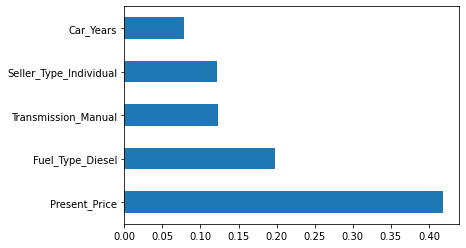

In [39]:
imprtnc=pd.Series(model.feature_importances_,index=x.columns)
imprtnc.nlargest(5).plot(kind='barh')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(240, 8)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [44]:
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [45]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [46]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{&#39;n_estimators&#39;: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], &#39;max_features&#39;: [&#39;auto&#39;, &#39;sqrt&#39;], &#39;max_depth&#39;: [5, 10, 15, 20, 25, 30], &#39;min_samples_split&#39;: [2, 5, 10, 15, 100], &#39;min_samples_leaf&#39;: [1, 2, 5, 10]}


In [48]:
rf=RandomForestRegressor()
# random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [50]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_sampl

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={&#39;max_depth&#39;: [5, 10, 15, 20, 25, 30],
                                        &#39;max_features&#39;: [&#39;auto&#39;, &#39;sqrt&#39;],
                                        &#39;min_samples_leaf&#39;: [1, 2, 5, 10],
                                        &#39;min_samples_split&#39;: [2, 5, 10, 15,
                                                              100],
                                        &#39;n_estimators&#39;: [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring=&#39;neg_mean_squared_error&#39;,
                   verbose=2)

In [52]:
predictions=rf_random.predict(x_test)
predictions

array([10.43475,  2.88855,  3.57002,  0.57429,  3.23782,  1.3776 ,
        4.10832,  0.48914,  5.51136,  4.9343 ,  1.37294,  7.4426 ,
        4.32752,  2.0822 ,  5.544  ,  5.10095, 20.26864,  0.30094,
        3.69009,  1.1356 ,  3.9153 ,  0.62929,  4.71364,  0.93085,
        4.62616,  6.9417 ,  0.5837 , 10.21897,  0.43598,  1.13171,
        3.69985,  5.38305,  0.90348,  2.6228 ,  8.34674, 10.56016,
        7.74136,  7.88535, 10.30013,  0.68199,  7.23168, 16.66428,
        5.58745,  0.99145,  5.39928,  2.8247 ,  6.47155, 10.5835 ,
        5.82875,  0.81528,  5.3198 ,  5.88838,  0.60749,  0.67307,
        9.07418,  0.77826,  0.45097,  0.71365,  5.1406 ,  3.07294,
        3.11995])

&lt;AxesSubplot:xlabel=&#39;Selling_Price&#39;, ylabel=&#39;Density&#39;&gt;

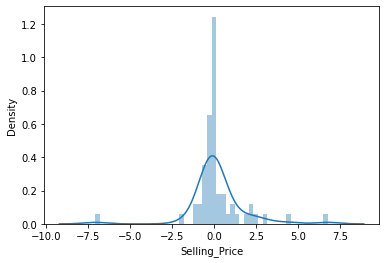

In [53]:
sb.distplot(y_test-predictions)

&lt;matplotlib.collections.PathCollection at 0x12c9ecf40&gt;

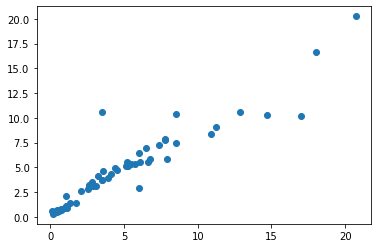

In [55]:
plt.scatter(y_test,predictions)

In [56]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)